In [1]:
import os, numpy as np, random, time
import pandas as pd
from keras.optimizers import SGD, RMSprop, Adagrad, Adam
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.utils import np_utils
from keras.layers.advanced_activations import LeakyReLU

from skimage.color import rgb2gray
from PIL import Image, ImageFilter, ImageOps, ImageColor, ImageEnhance

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


Using Theano backend.


In [2]:
# input image dimensions
img_rows, img_cols = 32, 32
# the CIFAR100 images are RGB
img_channels = 3
# number of classes
nb_classes =100


# define the network
model = Sequential()
 
model.add(ZeroPadding2D((1, 1), batch_input_shape=(1, img_channels, img_rows, img_cols)))
model.add(Convolution2D(64, 3, 3, border_mode='same',
                        input_shape=(img_channels, img_rows, img_cols)))
#model.add(LeakyReLU(alpha = 0.01))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(64, 3, 3))
#model.add(LeakyReLU(alpha = 0.01))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, 3, 3, border_mode='same'))
#model.add(LeakyReLU(alpha = 0.01))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, 3, 3))
#model.add(LeakyReLU(alpha = 0.01))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, border_mode='same'))
#model.add(LeakyReLU(alpha = 0.01))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3))
#model.add(LeakyReLU(alpha = 0.01))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
#model.add(LeakyReLU(alpha = 0.01))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#model.add(Dense(512))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
 
adg = Adagrad(lr = 0.01, epsilon = 1e-07)
model.compile(loss='categorical_crossentropy',
             optimizer=adg,
             metrics=['accuracy'])

# load weights
model.load_weights("model.h5")

In [3]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


X_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


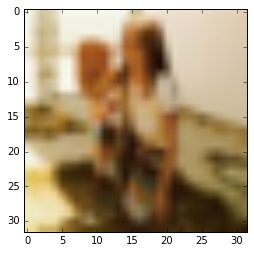

In [4]:
plt.imshow(X_test[99].astype('float32').transpose(1,2,0))
plt.show()

In [5]:
# Add noise
noise_factor = 0.1
train_filter = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
test_filter = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

train_filter = np.clip(train_filter, 0., 1.)
test_filter = np.clip(test_filter, 0., 1.)


'\ngray_X_train_filter = np.copy(X_train)\ngray_X_test_filter = np.copy(X_test)\n\nfor i in range(0, 50000):\n    for j in range(0,32):\n        for k in range(0,32):\n            gray_X_train[i][0][j][k] = avg_train[i][j][k]\n            gray_X_train[i][1][j][k] = avg_train[i][j][k]\n            gray_X_train[i][2][j][k] = avg_train[i][j][k]\n            gray_X_train_filter[i][0][j][k] = avg_train_filter[i][j][k]\n            gray_X_train_filter[i][1][j][k] = avg_train_filter[i][j][k]\n            gray_X_train_filter[i][2][j][k] = avg_train_filter[i][j][k]\n            \n\nfor i in range(0, 10000):\n    for j in range(0,32):\n        for k in range(0,32):\n            gray_X_test[i][0][j][k] = avg_test[i][j][k]\n            gray_X_test[i][1][j][k] = avg_test[i][j][k]\n            gray_X_test[i][2][j][k] = avg_test[i][j][k]\n            gray_X_test_filter[i][0][j][k] = avg_test_filter[i][j][k]\n            gray_X_test_filter[i][1][j][k] = avg_test_filter[i][j][k]\n            gray_X_tes

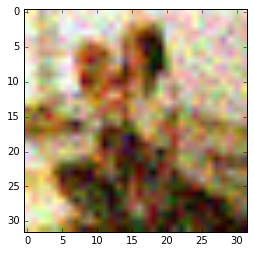

In [6]:
plt.imshow(test_filter[99].astype('float32').transpose(1,2,0))
plt.show()

In [7]:
# make predictoin on the clean test set
y_pred = model.predict_classes(X_test)
#print(y_pred)
#print(y_test)

# accuracy
acc = sum((y_test.flatten()-y_pred)==0)/len(y_pred)
print(acc)

10000/10000 [==============================] - 65s    
0.364


In [8]:
# make predictoin on the noisy test set
y_pred_filter = model.predict_classes(test_filter)
#print(y_pred_filter)
#print(y_test)

# accuracy
acc_filter = sum((y_test.flatten()-y_pred_filter)==0)/len(y_pred_filter)
print(acc_filter)

10000/10000 [==============================] - 66s    
0.1736


In [15]:
np.sum((test_filter - X_test)**2)/(10000*1024)

0.027331102170065343

In [12]:
X_train.shape

(50000, 3, 32, 32)

In [14]:
from keras.layers import UpSampling2D
autoencoder = Sequential()
autoencoder.add(Convolution2D(32,3,3,
                        border_mode='same',
                        input_shape=(3,32,32)))
autoencoder.add(Activation('relu'))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))
autoencoder.add(Convolution2D(32,3,3, border_mode='same'))
autoencoder.add(Activation('relu'))
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Convolution2D(3,3,3, border_mode='same'))
autoencoder.add(Activation('sigmoid'))

autoencoder.compile(loss='binary_crossentropy', optimizer='adadelta')

# data
X_train_auto = X_train.reshape(50000, 3, 32, 32)
X_train_filter_auto = train_filter.reshape(50000, 3, 32, 32)
X_test_auto = X_test.reshape(10000, 3, 32, 32)
X_test_filter_auto = test_filter.reshape(10000, 3, 32, 32)

# train autoencoder
autoencoder.fit(train_filter, X_train,
                nb_epoch=5,
                batch_size=16,
                shuffle=True,
                validation_data=(test_filter, X_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 191s - loss: 0.5446 - val_loss: 0.5356
Epoch 2/5
50000/50000 [==============================] - 190s - loss: 0.5349 - val_loss: 0.5342
Epoch 3/5
50000/50000 [==============================] - 186s - loss: 0.5337 - val_loss: 0.5322
Epoch 4/5
50000/50000 [==============================] - 187s - loss: 0.5330 - val_loss: 0.5317
Epoch 5/5
50000/50000 [==============================] - 187s - loss: 0.5326 - val_loss: 0.5314


'\nautoencoder.fit(X_train_filter_auto, X_train_auto,\n                nb_epoch=5,\n                batch_size=16,\n                shuffle=True,\n                validation_data=(X_test_filter_auto, X_test_auto))\n'

In [19]:
# restore noisy data using autoencoder and calculate resultant mse
test_filter_decoded = autoencoder.predict(test_filter)

In [17]:
np.sum((X_test.reshape(10000, 3072) - test_filter_decoded.reshape(10000, 3072))**2)/(10000*3072)

0.0027540894409466754

In [18]:
# make predictoin on the decoded noisy test set
y_pred_filter_decoded = model.predict_classes(test_filter_decoded)
#print(y_pred_filter_decoded)
#print(y_test)

# accuracy
acc_filter_decoded = sum(
    (y_test.flatten()-y_pred_filter_decoded)==0)/len(y_pred_filter_decoded)
print(acc_filter_decoded)

10000/10000 [==============================] - 64s    
0.297


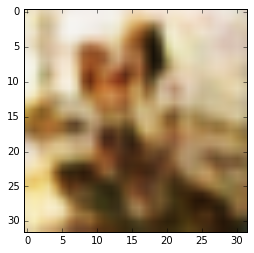

In [20]:
plt.imshow(test_filter_decoded[99].astype('float32').transpose(1,2,0))
plt.show()